# KnearestNeighbors

In [1]:
#30/12/2019
#K-nearest neighbours algorithm
#it works based on distance, superwised,voting
#based upon a random value, we are trying to classify

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier as KNN,KNeighborsRegressor as KNR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


data=load_iris()

X=data.data
Y= data.target
#print(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.3)
#we are going to normalize data , to make both variables x and y in the same range according to convenience
# like changing from milli seconds to km per hour when we have large data
Normalization=StandardScaler()
Normalization.fit(X_train)
X_train=Normalization.transform(X_train)
X_test=Normalization.transform(X_test)
#tuning parameter  n_neighbors=2 ,1,5 change these paras
#n_neighbors=2 this is the number of nearest points
#Error=[]
#Accuracy=[]
#k=1 accuracy 95  , k=2 accuracy 97, k values and accuracy chanes, we dont know in which k value accuracy is maximum,
#so we are creating an empty list and going to appened values

#another method to find best parametr is grid search (used in this example)
#why these things in this algorithm ? becz k value might be infinity, its difficult to manually check, in all other algorithms-
#tuning parameters are of specific value.

params={'n_neighbors':[2,3,4,5,6,7,8,9]}
Regressor=KNR()
model3=GridSearchCV(Regressor,params,cv=5)
model3.fit(X_train,Y_train)
print(model3.best_params_)
#now we got the best parameter as 5..(see output, n_neighbors =5)..so we will get maximum accuracy when giving n_neighbors as 5

model=KNN(n_neighbors=5) 
#print(model)
model.fit(X_train,Y_train)
model.predict(X_test)
Y_pred=model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))


        

{'n_neighbors': 5}
0.9777777777777777


In [3]:
#31/12/2019
#2nd method using list

0.9777777777777777


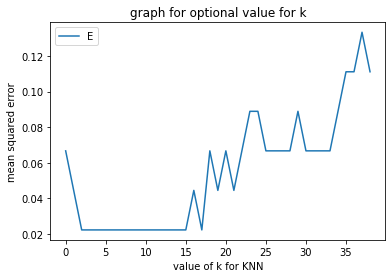

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier as KNN,KNeighborsRegressor as KNR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



data=load_iris()

X=data.data
Y= data.target
#print(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.3)
Normalization=StandardScaler()
Normalization.fit(X_train)
X_train=Normalization.transform(X_train)
X_test=Normalization.transform(X_test)


#creating two null lists
Error=[]
Accuracy=[]
for i in range(1,40):# 40 is the number of rows
    modelk=KNN(n_neighbors=i)
    modelk.fit(X_train,Y_train)
    Y_pred=modelk.predict(X_test)
    Error.append(mean_squared_error(Y_pred,Y_test)) #appending values in to the null list
    Accuracy.append(accuracy_score(Y_pred,Y_test))
    
#print(Accuracy)

#we are going to plot a graph
curve=pd.DataFrame(Error) #converting list in to dataframe
plt.plot(curve)
# see the output -->y axis error and x axis i value means k value ranges
#check in the graph in which k value min error coming
#here .02 error for k values 3 to 15 range, so this wil be the best k value we shud give
plt.legend("Elbow Curve")
plt.xlabel("value of k for KNN")
plt.ylabel("mean squared error")
plt.title("graph for optional value for k")

model=KNN(n_neighbors=6) 
#print(model)
model.fit(X_train,Y_train)
model.predict(X_test)
Y_pred=model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))



In [ ]:
#in order to find the relationship between columns, so that we can decide which columns need to omit during data modelling
#2 methods
#feature selection method and correlation method
#included feature selection in random forest example 
#included correlation in linear regression example (correlation matrix)